## Preparing Data

In [1]:
# Preparing training and testing data

import pandas as pd
import numpy as np
from sklearn import preprocessing

data = pd.read_csv('wine.data.csv')

# Normalizing feature values (all continuous!)
X = data[range(1, 14)]
y = data['Class']

X_scaled = preprocessing.scale(X)

## Visualizing Data

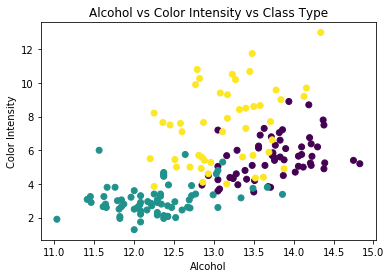

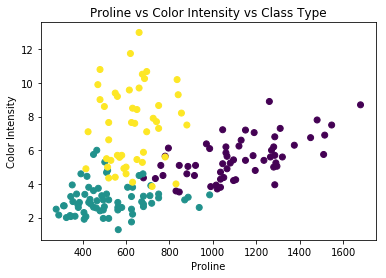

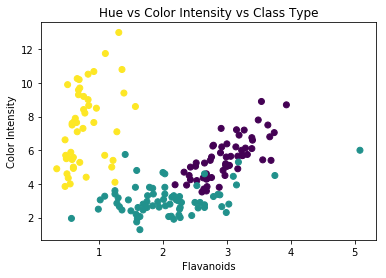

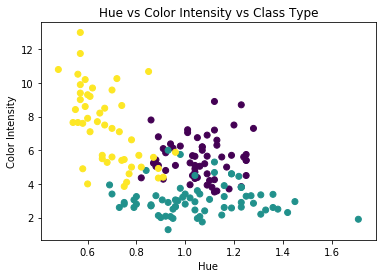

In [18]:
import matplotlib.pyplot as plt


# Alcohol vs Color Intensity
plt.scatter(data['Alcohol'], data['Color_Intensity'], c = data['Class'])
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('Alcohol vs Color Intensity vs Class Type')
plt.show()

# Proline vs Color Intensity 
plt.scatter(data['Proline'], data['Color_Intensity'], c = data['Class'])
plt.xlabel('Proline')
plt.ylabel('Color Intensity')
plt.title('Proline vs Color Intensity vs Class Type')
plt.show()

# Flavonoids vs Color Intensity 
plt.scatter(data['Flavanoids'], data['Color_Intensity'], c = data['Class'])
plt.xlabel('Flavanoids')
plt.ylabel('Color Intensity')
plt.title('Hue vs Color Intensity vs Class Type')
plt.show()


# Hue vs Color Intensity
plt.scatter(data['Hue'], data['Color_Intensity'], c = data['Class'])
plt.xlabel('Hue')
plt.ylabel('Color Intensity')
plt.title('Hue vs Color Intensity vs Class Type')
plt.show()

Taking a look at the top ranked features vs their class, it's evident that each class of wine is distinctly visible among the other classes, despite some overlap. By sight, the minimum amount of overlap appears in the grahps of Proline vs Color Intensity. We will try to reduce the amount of features to simplify the model and possibly improve accuracy. 

## Feature Ranking/Selection

In [53]:
# Feature Ranking:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC() 

# Initial feature ranking: (Roughly), What features are most correlated with the class type? 

rfe_rank = RFE(lin_svc, n_features_to_select=1)
rfe_rank.fit(X_scaled, y)
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfe_rank.ranking_), list(data.columns)[1:]))
print ""



Features sorted by their rank:
[(1.0, 'Color_Intensity'), (2.0, 'Proline'), (3.0, 'Flavanoids'), (4.0, 'Alcohol'), (5.0, 'Hue'), (6.0, 'Ash'), (7.0, 'OD280'), (8.0, 'Alcalinity_Ash'), (9.0, 'Malic Acid'), (10.0, 'Nonflavanoid_Phenols'), (11.0, 'Proanthocyanins'), (12.0, 'Magnesium'), (13.0, 'Total_Phenols')]



What features contribute the most to the class? Our initial feature reanking shows that Color_Intenstiy, Proline, Flavonoids, Alcohol, adn Hue are the top the top 5 predictors. 

This aligns with our initial hypotheses, considering that alcohol content, Hue, and Color Intenstiy are the most visible differences that even humans can discern between wine types. In Fact, Sorting on Color Intensity and Alcohol content will predict roughly 60% of the samples correctly!

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

lin_svc = LinearSVC() 
rand_forest = RandomForestClassifier()
log_reg = LogisticRegression()



# performing recursive feature elimination for linear SVC, generating output estimator.
rfecv_linsvc = RFECV(estimator=lin_svc, step=1, cv=10, scoring='accuracy')
rfecv_linsvc.fit(X_scaled, y)

rfecv_rforest = RFECV(estimator=rand_forest, step=1, cv=10, scoring='accuracy')
rfecv_rforest.fit(X_scaled, y)

rfecv_logreg = RFECV(estimator=log_reg, step=1, cv=10, scoring='accuracy')
rfecv_logreg.fit(X_scaled, y)




print("Optimal number of features, Linear SVC : %d" % rfecv_linsvc.n_features_)
print("Optimal number of features, Random Forest : %d" % rfecv_rforest.n_features_)
print("Optimal number of features, Logistic Regression : %d" % rfecv_logreg.n_features_)
print " " 

print "Feature Ranking, Linear SVC" , sorted(zip(map(lambda x: round(x, 4), rfecv_linsvc.ranking_), list(data.columns)[1:]))
print " " 
print "Feature Ranking, Random Forest", sorted(zip(map(lambda x: round(x, 4), rfecv_rforest.ranking_), list(data.columns)[1:]))
print " " 
print "Feature Ranking, Logistic Regression", sorted(zip(map(lambda x: round(x, 4), rfecv_logreg.ranking_), list(data.columns)[1:]))




Features sorted by their rank:
[(1.0, 'Color_Intensity'), (2.0, 'Proline'), (3.0, 'Flavanoids'), (4.0, 'Alcohol'), (5.0, 'Hue'), (6.0, 'Ash'), (7.0, 'OD280'), (8.0, 'Alcalinity_Ash'), (9.0, 'Malic Acid'), (10.0, 'Nonflavanoid_Phenols'), (11.0, 'Proanthocyanins'), (12.0, 'Magnesium'), (13.0, 'Total_Phenols')]

Optimal number of features, Linear SVC : 8
Optimal number of features, Random Forest : 13
Optimal number of features, Logistic Regression : 12
 
Feature Ranking, Linear SVC [(1.0, 'Alcalinity_Ash'), (1.0, 'Alcohol'), (1.0, 'Ash'), (1.0, 'Color_Intensity'), (1.0, 'Flavanoids'), (1.0, 'Hue'), (1.0, 'OD280'), (1.0, 'Proline'), (2.0, 'Malic Acid'), (3.0, 'Nonflavanoid_Phenols'), (4.0, 'Proanthocyanins'), (5.0, 'Magnesium'), (6.0, 'Total_Phenols')]
 
Feature Ranking, Random Forest [(1.0, 'Alcalinity_Ash'), (1.0, 'Alcohol'), (1.0, 'Ash'), (1.0, 'Color_Intensity'), (1.0, 'Flavanoids'), (1.0, 'Hue'), (1.0, 'Magnesium'), (1.0, 'Malic Acid'), (1.0, 'Nonflavanoid_Phenols'), (1.0, 'OD280'), (

Here, we use Recursive Feature Elimination, within a Cross Validation loop (RFECV) to determine the optimal number of features, as well as find the rankings of the features. As we can see, we see that the rankings of the features correspond roughly to our initial ranking. 

## Evaluating Algorithms

In [60]:
from sklearn.model_selection import cross_val_score

# runs kfolds cross validation 
def run_kfolds(X, y, kf, model, folds):
    acc = 0 
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        y_preds = model.predict(X_test)
        acc = acc +  float(accuracy_score(y_test, y_preds))/folds
        
    return acc

# Function to optimize K-nearest neighbors validation. 
def optimize_knn():
    opt_n = 1
    max_acc = 0
    for n in range(1, 50):
        knn = KNeighborsClassifier(n_neighbors = n)
        avg_acc = run_kfolds(X_scaled, y, kf, knn, 10)
        if avg_acc > max_acc:
            max_acc = avg_acc
            opt_n = n
    
    print max_acc, opt_n

        
kf = KFold(n_splits=10, shuffle= True, random_state= 1)

# Linear SVC -- before and after feature selection (10 fold CV)
print "LINEAR SVC"
print run_kfolds(X_scaled, y, kf, lin_svc, 10)
print run_kfolds(rfecv_linsvc.transform(X_scaled), y, kf, lin_svc, 10)
print ""

# All features intact (Random Forests)
print"RANDOM FOREST"
print run_kfolds(X_scaled, y, kf, rand_forest, 10)
print run_kfolds(rfecv_rforest.transform(X_scaled), y, kf, rand_forest, 10)
print ""


# All features intact (Logistic Regression)
print"LOGISTIC REGERSSION"
print run_kfolds(X_scaled, y, kf, log_reg, 10)
print run_kfolds(rfecv_logreg.transform(X_scaled), y, kf, log_reg, 10)
print ""

print "K NEAREST NEIGHBORS"

optimize_knn()


LINEAR SVC
0.982679738562
0.983006535948

RANDOM FOREST
0.983333333333
0.983006535948

LOGISTIC REGERSSION
0.982679738562
0.988562091503

K NEAREST NEIGHBORS
0.977777777778 30


It appears that Feature Selection slightly increased the accuracy of most the classifiers, with the exception of the Random Forest Algorithm. For now, it appear that feature-reduced logistic regression is the optimal method. 